<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# 09 Aprendizaje no supervisado: Agrupamiento

- Definiciones básicas de agrupamiento
- Algoritmo de k-medias
- Agrupamiento jerárquico
  - División
  - Aglomerativo

## Versión v.1.0

El notebook lo puedo modificar, esta versión es la v.1 a 04/08/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Aprendizaje no supervisado

El **aprendizaje no supervisado** es un tipo de algoritmo de aprendizaje automático que se utiliza para descubrir patrones en los datos. A diferencia del aprendizaje supervisado, no utiliza datos etiquetados, es decir, los datos no vienen con instrucciones predefinidas. Su objetivo es explorar la estructura de los datos para extraer información significativa sin la guía de un objetivo específico.

Si antes teníamos $$\hat{f}(x)=y \text{ con } x\in \mathbb{R}^{n, m} \text{ y además } y \in \mathbb{R}^n $$

Ahora simplemente disponemos de $$ x_1, x_2, \cdots x_n \text{ y solo sabemos que } x \in \mathbb{R}^m$$



## Características Principales

- **Datos no etiquetados**: Utiliza conjuntos de datos que no tienen etiquetas o categorías conocidas.
- **Descubrimiento de patrones**: Identifica patrones comunes y características en los datos.
- **Autonomía**: Capaz de operar con poca o ninguna intervención humana.
- **Flexibilidad**: Aplicable a una amplia gama de dominios y tipos de datos.



## Aplicaciones Comunes

1. **Agrupamiento (Clustering)**: Divide el conjunto de datos en grupos basados en similitudes.
2. **Reducción de Dimensionalidad**: Reduce el número de variables consideradas en un conjunto de datos.
3. **Detección de Anomalías**: Identifica casos inusuales o atípicos en los datos.
4. **Visualización de Datos**: Facilita la comprensión y visualización de estructuras complejas en los datos.



## Métodos Populares

### De agrupamiento

- **K-Means (k-medias)**: Un algoritmo de agrupamiento que asigna cada instancia de nuestros datos a uno de K grupos.
- **Agrupamiento jerárquico**: Objetivo: construir una jerarquía de clusters. A diferencia de los métodos de agrupamiento "planos" como K-medias, el agrupamiento jerárquico no requiere especificar el número de clusters de antemano y ofrece una representación visual en forma de dendrograma que es intuitiva y reveladora.

### De reducción de dimensionalidad

- **Análisis de Componentes Principales (PCA)**: Técnica de reducción de dimensionalidad que busca una representación en *menor* dimensión que explique gran parte de la *varianza*
- LLE, UMAP, t-SNE: Técnicas de reducción de dimensionalidad usadas, en la mayoría de casos, para visualizar conjuntos de datos de dimensión muy grande en imágenes o volúmenes.



## Ventajas y Desventajas

### Ventajas

- **Flexibilidad**: Puede ser aplicado a cualquier tipo de datos.
- **Descubrimiento de conocimientos**: Capaz de revelar estructuras ocultas en los datos.

### Desventajas

- **Interpretación**: Los resultados pueden ser difíciles de interpretar.
- **Dependencia de los Datos**: Requiere una gran cantidad de datos para ser efectivo.

# Agrupamiento - (Clustering)

## K-medias

Método que permite hacer una *partición* del dataset en $k$ subconjuntos.

### Partición de un conjunto

Imaginemos que tenemos nuestro dataset $D$ queremos hacer una partición del mismo y en $k$ subconjuntos.

1. $C_1 \cup C_2 \cup \cdots \cup C_K=\{1, \ldots, n\}$. Es decir, **cada** observación pertenece a algún cluster $C_i$ y es claro que $i \in [ 1, k]$.
2. $C_k \cap C_{k^{\prime}}=\emptyset \; \forall \; k \neq k^{\prime}$. Es decir, no hay solapamiento de los elementos de cada cluster.

Dónde usamos particiones antes?

### Variando la dimensión de $k$

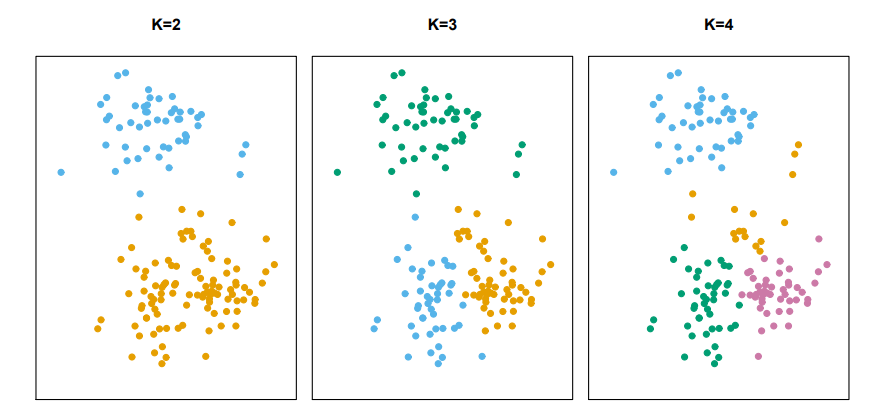

Tomado de ISLP P. 528

La idea principal de K-medias es que la **varianza** dentro de cada cluster sea la mínima posible. Esta medida, que por ahora podemos llamar, $W(C_k)$ (within-cluster variation) nos ayuda a definir el problema a resolver:

### El problema básico en k-medias

$$
\underset{C_1, \ldots, C_K}{\operatorname{min}}\left\{\sum_{k=1}^k W\left(C_k\right)\right\}
$$

- Recordemos: qué es $C_k$?
- La suma de todas las variaciones, por cluster, tiene que ser lo más pequeña posible.
- Cuál es, entonces, el mejor $k$ posible?

### Cómo podemos definir $W(C_k)$

#### Ideas

-

#### Midiento distancias

Como es el caso para regresión, SVM y redes neuronales: vamos a usar la norma 2.

Para medir **la distancia** entre dos instancias $p$ y $q$ recordemos:}

$$d(\mathbf{p}, \mathbf{q}) = \| p-q\| = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}
 $$



Si queremos definir la distancia entre dos puntos, es lo mismo que calcular

\begin{align}
W\left(C_k\right) &= \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} d(x_i, x_{i^\prime}) \\
&=  \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \| x_i-x_{i^\prime}\| \\
 &= \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \sqrt{ \sum_{j=1}^m\left(x_{i j}-x_{i^{\prime} j}\right)^2}
\end{align}

- Al dividir por la cardinalidad de cada cluster $\left|C_k\right|$ tenemos la distancia media.
- Como la raíz cuadrada para números positivos es positiva y monotona creciente. Podemos eliminarla de los cálculos.

La medida de **varianza** dentro del clúster la definimos finalmente como:

\begin{align}
W\left(C_k\right) &= \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} d(x_i, x_{i^\prime}) \\
&=  \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \| x_i-x_{i^\prime}\|^2  \\
 &= \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \sum_{j=1}^m\left(x_{i j}-x_{i^{\prime} j}\right)^2
\end{align}

Nuestro problema, finalmente, es el siguiente:
$$
\underset{C_1, \ldots, C_K}{\operatorname{min}}\left\{\sum_{k=1}^k W\left(C_k\right)\right\} = \underset{C_1, \ldots, C_K}{\operatorname{min}}\left\{\sum_{k=1}^k \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \sum_{j=1}^m\left(x_{i j}-x_{i^{\prime} j}\right)^2\right\}
$$

Es fácil demostrar que es equivalente a

$$
 \underset{C_1, \ldots, C_K}{\operatorname{min}}\left\{\sum_{k=1}^k  \sum_{x_i \in C_k} \| x_i-\mu_k\|^2 \right\} \text{ con } \mu_k = \frac{1}{\left|C_k\right|} \sum_{x_i \in C_k} x_i
$$

Qué podemos hacer para resolver este problema?

$$ \underset{C_1, \ldots, C_K}{\operatorname{min}}\left\{\sum_{k=1}^k \frac{1}{\left|C_k\right|} \sum_{(i, i^{\prime}) \in C_k} \sum_{j=1}^m\left(x_{i j}-x_{i^{\prime} j}\right)^2\right\}   $$

## Algoritmo de K-medias

1. Asignar de manera aleatoria a $k$ de las $n$ instancias como "centros". Con esto, podemos inicializar la asignación de clústers.
2. Iterar hasta que los clústers no cambien!:
  - Para cada cluster $k$, calcula el nuevo centroide del clúster. El $k$-ésimo centroide es el promedio de todos los elementos del cluster $C_k$.
  - Asignar de nuevo cada observación al centroide más cercano usando distancia euclideana.

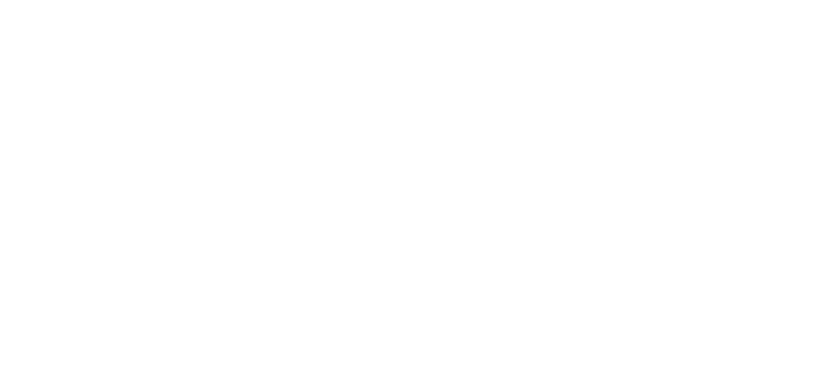

### INVESTIGAR

Pero podemos escoger otro centroide?

Es fácil demostrar que el cálculo del centroide como "todos los elementos más cercanos al nuevo centroide en la iteración $t$" es decir, $$ \mu^{(t)}_k = \frac{1}{\left|C^{(t-1)}_k\right|} \sum_{x_i \in C^{(t-1)}_k} x_i$$

es el **mejor** posible.

Cómo harían?





#### Código de ejemplo?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


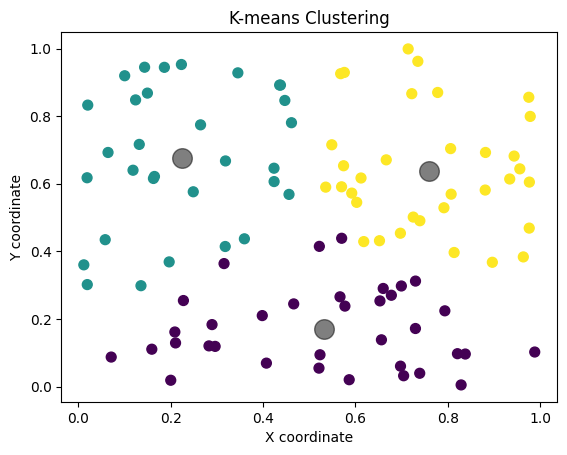

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Example data - let's create some random data for this example
np.random.seed(0)
X = np.random.rand(100, 2)

# Specify the number of clusters (k)
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

#### Problemas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


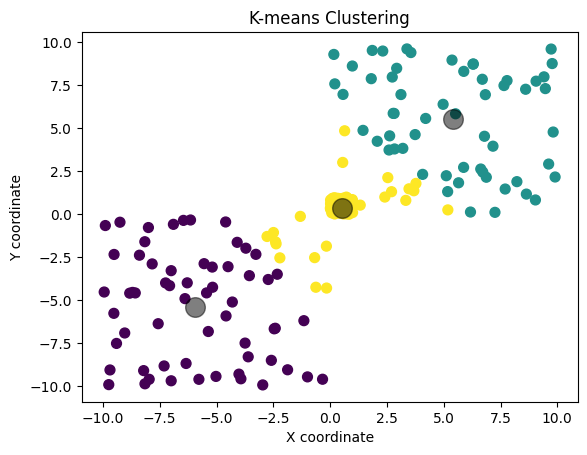

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Example data - let's create some random data for this example
np.random.seed(0)
X = np.random.rand(100, 2)
Y = 10*np.random.rand(70, 2)
Z = -10*np.random.rand(70, 2)

X = np.concatenate([X, Y, Z], axis=0)

# Specify the number of clusters (k)
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()


### Método del Codo para K-Medias

Escogiendo el mejor $k$

El **método del codo** es una técnica heurística utilizada para determinar el número óptimo de clusters en los que se deben agrupar los datos.

## ¿Cómo Funciona?

Ejecutamos el algoritmo de K-medias en el conjunto de datos para un rango de valores de K (por ejemplo, de 1 a 10), y luego calcular la suma de los cuadrados de las distancias de cada punto a su centroide asignado.

## Pasos para Implementar el Método del Codo

1. **Ejecutar K-medias para diferentes valores de K**: Por lo general, se inicia con k=1 y se incrementa hasta un número razonable (por ejemplo, 10).

2. **Calcular la $W\left(C_k\right)$**: Se calcula la suma total de las distancias al cuadrado entre cada punto y el centroide de su cluster.

3. **Graficar los resultados**: Se traza un gráfico de línea con los valores de K en el eje horizontal y la $W\left(C_k\right)$ total en el eje vertical.

4. **Identificar el 'codo' en el gráfico**: El punto donde la disminución de $W\left(C_k\right)$ comienza a minimizarse (es decir, el gráfico comienza a aplanarse) indica el número óptimo de clusters. Este punto se asemeja a un "codo" en el gráfico.

## Importancia del Método del Codo

El método del codo es importante porque:

- **Determina el Número Óptimo de Clusters**: Ayuda a evitar tanto la sobre-segmentación (demasiados clusters) como la sub-segmentación (demasiados pocos clusters).

- **Basado en un Criterio Cuantitativo**: Proporciona una métrica basada en datos para tomar una decisión informada sobre el número de clusters.

- **Facilidad de Implementación**: Es un método relativamente sencillo y fácil de interpretar.

## Limitaciones

A pesar de su utilidad, el método del codo tiene limitaciones:

- **Subjetividad en la Identificación del Codo**: A veces puede ser difícil identificar el punto exacto del codo, especialmente si la curva es suave.

- **No Funciona Bien con Algunas Distribuciones de Datos**: En casos donde los datos no tienen una estructura de clústeres clara, el método del codo puede no ser efectivo.


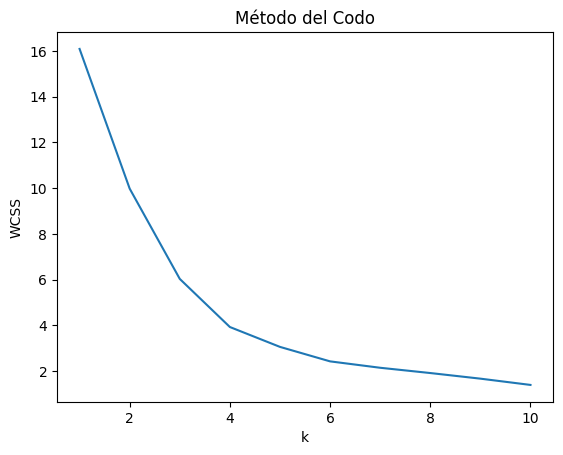

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 2)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar los resultados
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

## Agrupamiento Jerárquico



El **Agrupamiento Jerárquico** es una técnica de aprendizaje no supervisado utilizada para construir una jerarquía de clusters. A diferencia de los métodos de agrupamiento "planos" como K-Means, el agrupamiento jerárquico no requiere especificar el número de clusters de antemano y ofrece una representación visual en forma de dendrograma que es intuitiva y reveladora.

#### Proceso

1. **Inicio**: Cada punto de datos es tratado como un cluster individual.
2. **Enlace**: En cada paso, los clusters más cercanos (según algún criterio de distancia) se fusionan.
3. **Iteración**: Este proceso se repite hasta que todos los datos están en un solo cluster o hasta que se cumple un criterio de parada.

#### Tipos de Agrupamiento Jerárquico

- **Aglomerativo (Bottom-up)**: Comienza con clusters individuales que se van fusionando en clusters de alto nivel.


```python
import numpy as np
import numpy.typing as npt

def aglomerativo(D: Dataset):
  Inicializar matriz de distancia M (n x n) usando D
  while(criterioFin())
    Cluster i, Cluster j = Escoger los mejores candidatos de clusters i y j para unirse usando M
    
    Cluster ij = Unificar clusters i y j
    
    Actualizar M, borrando filas i y j
    Crear nueva fila en base al clúster nuevo usando criterio C para cluster ij
        
    Modificar entradas de la matriz de distancia M
    
    return Devolver conjunto de clusters actual;
end
```

- **Divisivo (Top down)**: Comienza con un cluster que contiene todos los puntos y se va dividiendo creando nuevas particiones de los datos.

```python
def divisivo(D: Dataset, A: Algoritmo para dividir ):
  Árbol T = Inicializar árbol coin raiz en dataset D
  
  while (criterioParaDividir):
    L = seleccionar hoja en árbol T basado en un criterio de selección
    Actualizar árbol T, separando L en L_1 ,..., L_k
    Agregar L_1 ,..., L_k como hijos de L en T

  return Árbol T

```

#### Criterios de Distancia

- **Enlace Simple**: Minimiza la distancia entre dos clusters es igual a la distancia más corta entre dos puntos en los clusters. $$
d(A, B) \equiv \min _{\vec{x} \in A, \vec{y} \in B}\|\vec{x}-\vec{y}\|
$$
- **Enlace Completo**: Minimiza la distancia entre dos clusters es igual a la distancia más larga entre dos puntos en los clusters. $$
d(A, B) \equiv \max _{\vec{x} \in A, \vec{y} \in B}\|\vec{x}-\vec{y}\|
$$
- **Enlace Promedio**: Minimiza el promedio de todas las distancias entre puntos en los dos clusters.
- **Ward**: La distancia entre dos clusters se decide en base a un criterio de varianza luego de la unión.
$$
\begin{aligned}
\Delta(A, B) & =\sum_{i \in A \cup B}\left\|\vec{x}_i-\vec{m}_{A \cup B}\right\|^2-\sum_{i \in A}\left\|\vec{x}_i-\vec{m}_A\right\|^2-\sum_{i \in B}\left\|\vec{x}_i-\vec{m}_B\right\|^2 \\
& =\frac{n_A n_B}{n_A+n_B}\left\|\vec{m}_A-\vec{m}_B\right\|^2
\end{aligned}
$$

#### Ventajas

- **Visualización Intuitiva**: El dendrograma proporciona una representación visual clara.
- **No Necesita Número de Clusters**: A diferencia de otros métodos, no requiere especificar el número de clusters de antemano.

#### Desventajas

- **Complejidad Computacional**: Particularmente en grandes conjuntos de datos, puede ser computacionalmente costoso.
- **Sensibilidad a Ruido y Atípicos**: Puede ser sensible a ruido y valores atípicos en los datos.

El agrupamiento jerárquico es especialmente útil en situaciones donde la relación entre los datos es importante y cuando se desea una representación visual detallada de cómo los grupos están relacionados entre sí.


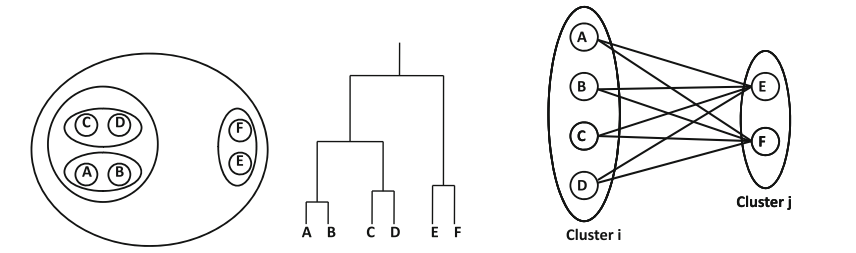

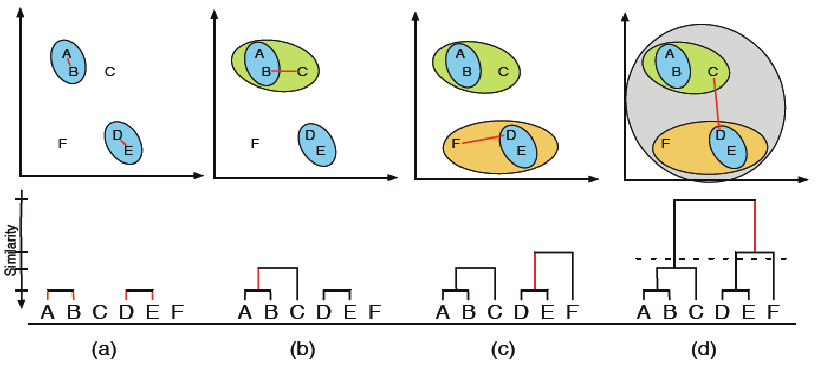

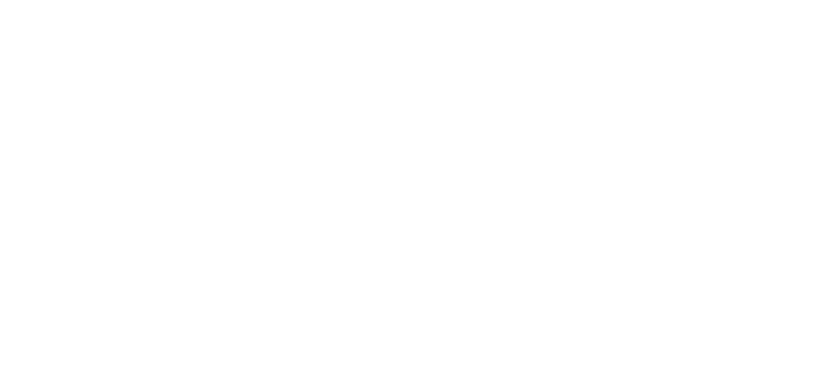

### Ejemplo de cluster aglomerativo

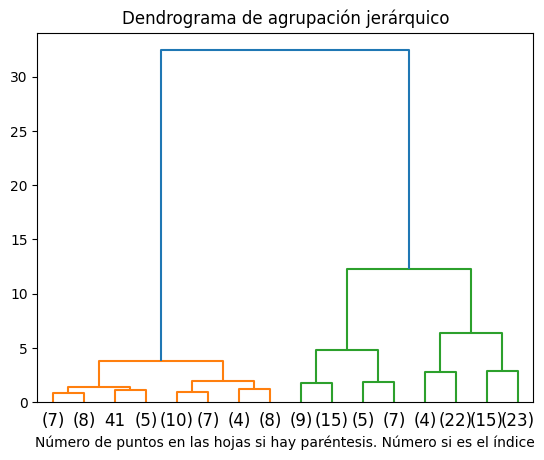

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Dendrograma de agrupación jerárquico")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de puntos en las hojas si hay paréntesis. Número si es el índice")
plt.show()

#### Alternativas

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [230.0, 230.0, 254.375, 254.375],
  [215.0, 215.0, 242.1875, 242.1875],
  [192.5, 192.5, 228.59375, 228.59375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [210.546875, 210.546875, 302.5, 302.5],
  [175.0, 175.0, 256.5234375, 256.5234375],
  [165.0, 165.0, 215.76171875, 215.76171875],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [415.0, 415.0, 425.0, 425.0],
  [392.5, 392.5, 420.0, 420.0],
  [370.0, 370.0, 406.25, 406.25],
  [355.0, 355.0, 388.125, 388.125],
  [435.0, 435.0, 445.0, 445.0],
  [371.5625, 371.5625, 440.0, 440.0],
  [345.0, 345.0, 405.78125, 40

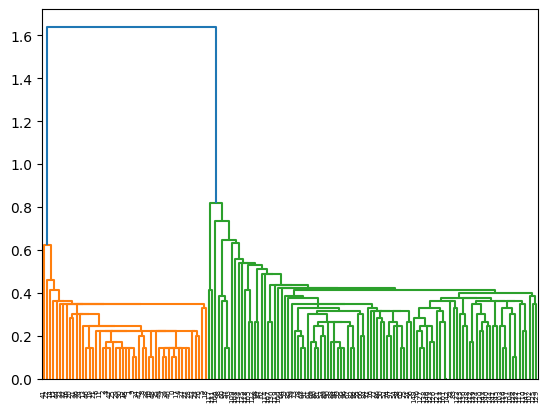

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

Z = linkage(X)

dendrogram(Z)

### Comparando las distancias

Ejemplo de [Comparando métodos de cluster aglomerativo](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

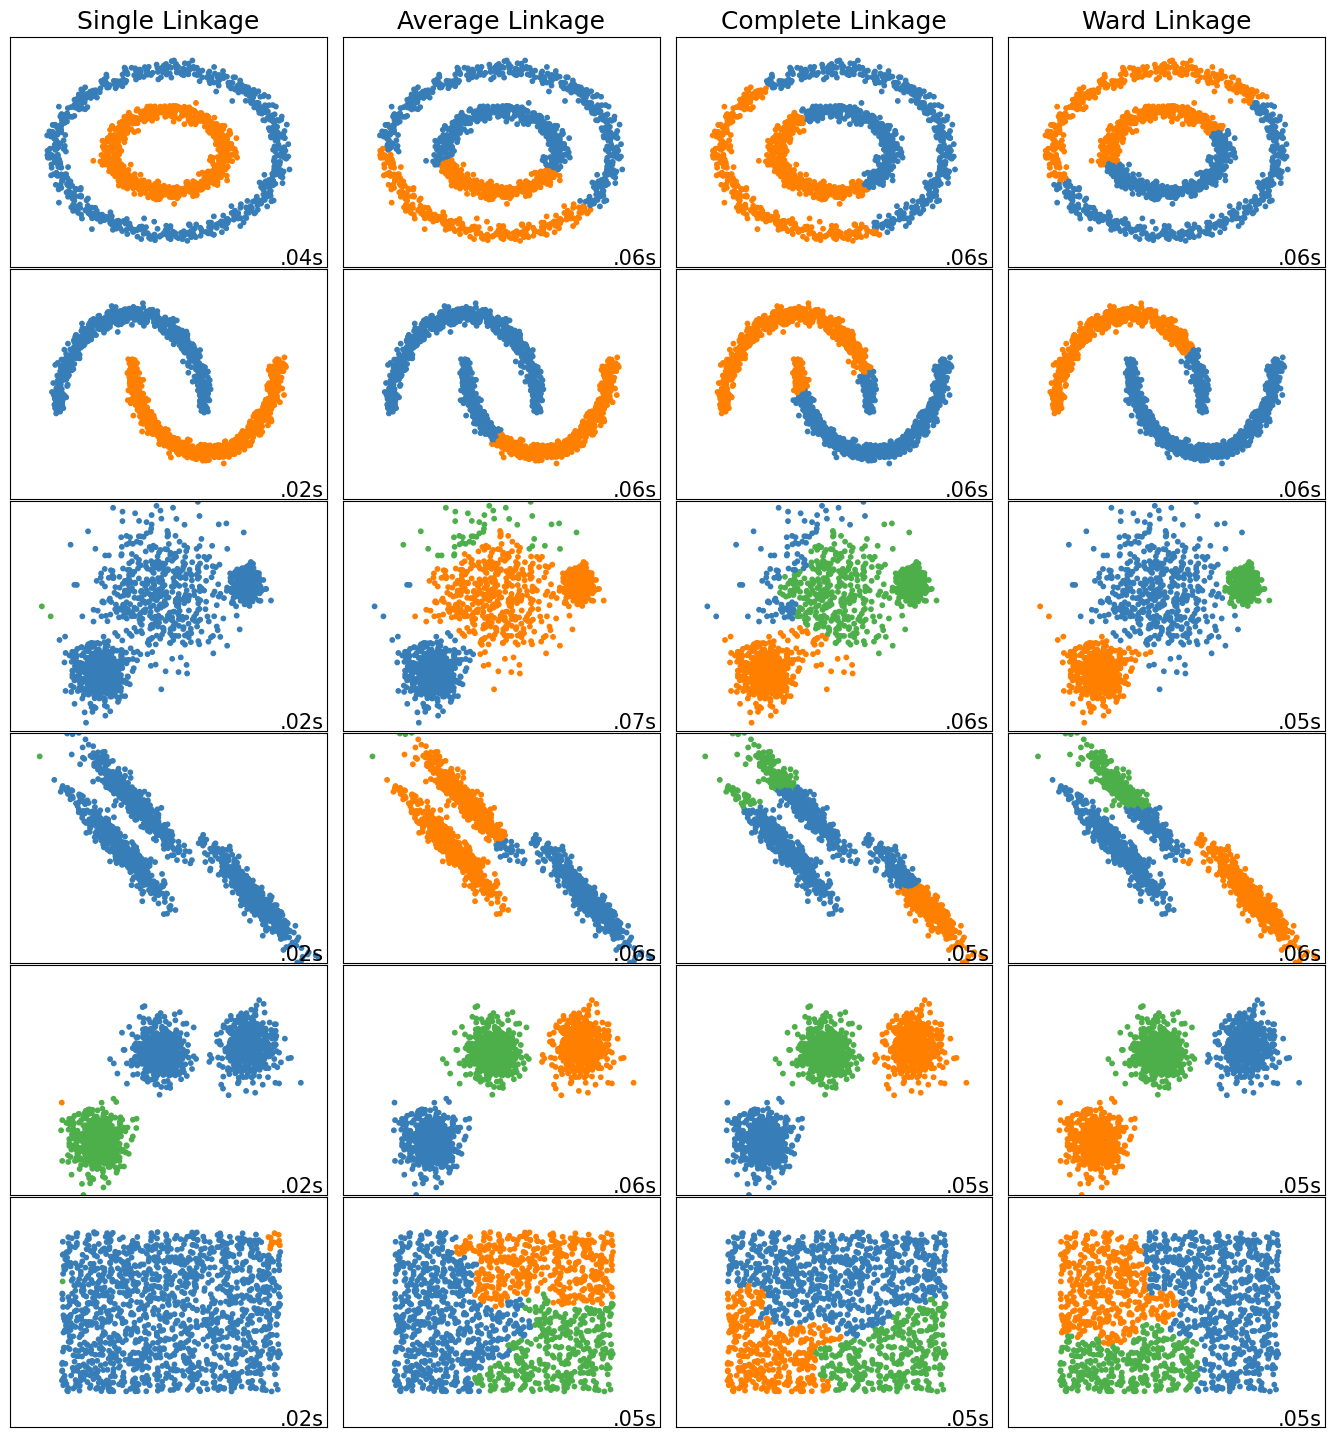

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Enlace simple", single),
        ("Enlace promedio", average),
        ("Enlace completo", complete),
        ("Enlace ward", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### Divisivo: K-medias bisector

El algoritmo de bisección de k-medias es un algoritmo de agrupamiento jerárquico de arriba hacia abajo en el que
cada nodo se divide en exactamente dos hijos con un algoritmo de 2 medias.